<a href="https://colab.research.google.com/github/sigvehaug/CAS-AML-M3/blob/main/IML_3_DT_Sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module 3, Deep Learning Research, CAS Advanced Machine Leaerning, 2020-10-01, S. Haug, University of Bern.

---

# Interpretable Machine Learning - Decision Trees

**Average expected study time :** 1 hour

**Main References**

- https://christophm.github.io/interpretable-ml-book
- https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3#:~:text=Feature%20Importance-,Feature%20importance%20is%20calculated%20as%20the%20decrease%20in%20node%20impurity,the%20more%20important%20the%20feature.
- https://machinelearningmastery.com/calculate-feature-importance-with-python/

**Main python modules used**
- sklearn.tree https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree

If you run this notebook on google colab, you will (probably) have no problems with importing the modules.

---


## Decision Trees

- Can model interactions and non-linear features
- Dissection of the feature space 
- Fast
- Easy to interprete
- Prone to overfitting

### Description
There are both Classification And Regressions Trees (CART).

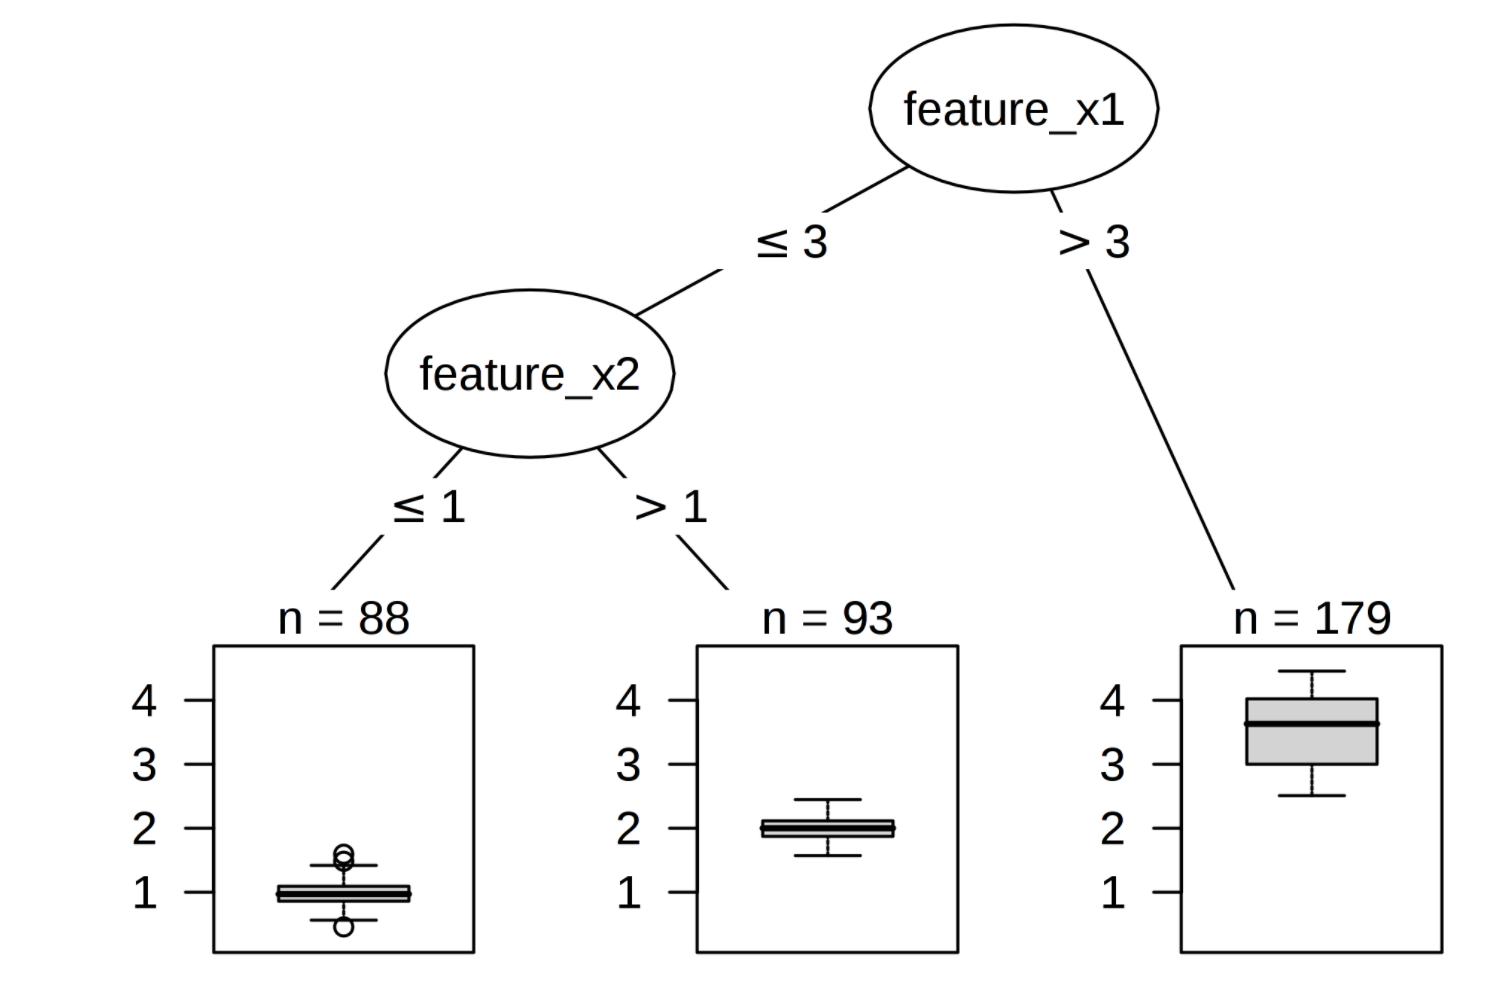

FIGURE 4.16: Decision tree with artificial data. Instances with a value greater than 3 for feature x1 end up in node 5. All other instances are assigned to node 3 or node 4, depending on whether values of feature x2 exceed 1.
</p>
</div>



### Interpretation

*   **Weight interpretation** The weights are just the fitted treshold values in each node.
*   **Instance explanation:** Straight forward, just follow its path down the tree.
*   **Feature importance:** The node probability can be calculated by the number of samples that reach the node, divided by the total number of samples. The higher the value the more important the feature in that node/decision.

### Example - Prediction of California House Prices with DT Regression



In [ ]:
##Get the data and take a look
import pandas as pd
from sklearn.datasets import load_boston
data = load_boston()
data
df = pd. DataFrame(data['data'],columns=data['feature_names'])
df.head()

In [ ]:
#Get the data and take a look
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html
import pandas as pd
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
print(data.target)
df = pd.DataFrame(data['data'],columns=data['feature_names'])
round(df.head())

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.0,41.0,7.0,1.0,322.0,3.0,38.0,-122.0
1,8.0,21.0,6.0,1.0,2401.0,2.0,38.0,-122.0
2,7.0,52.0,8.0,1.0,496.0,3.0,38.0,-122.0
3,6.0,52.0,6.0,1.0,558.0,3.0,38.0,-122.0
4,4.0,52.0,6.0,1.0,565.0,2.0,38.0,-122.0


In [ ]:
# Train a tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)
reg = DecisionTreeRegressor(max_depth=10).fit(x_train, y_train) # max_depth=30
predicted_test = reg.predict(x_test)
expected_test = y_test
predicted_train = reg.predict(x_train)
expected_train = y_train

In [ ]:
# Check the tree dimensions
print(reg.get_depth(), reg.get_n_leaves())

35 15821


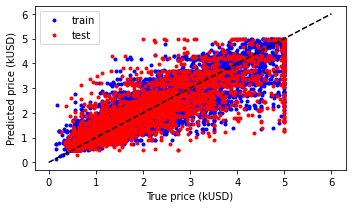

In [ ]:
# Look at the prediction variance, e.g. with a scatter plot
from matplotlib import pyplot as plt
plt.figure(figsize=(5, 3))
#plt.scatter(expected, predicted)
plt.plot(expected_train,predicted_train, '.b',label='train')
plt.plot(expected_test,predicted_test, '.r',label='test')
plt.legend()
plt.plot([0, 6], [0, 6], '--k')
plt.axis('tight')
plt.xlabel('True price (kUSD)')
plt.ylabel('Predicted price (kUSD)')
plt.tight_layout()

In [ ]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

|--- MedInc <= 5.04
|   |--- MedInc <= 3.07
|   |   |--- AveRooms <= 4.31
|   |   |   |--- MedInc <= 2.23
|   |   |   |   |--- value: [1.37]
|   |   |   |--- MedInc >  2.23
|   |   |   |   |--- value: [1.90]
|   |   |--- AveRooms >  4.31
|   |   |   |--- MedInc <= 2.37
|   |   |   |   |--- value: [0.95]
|   |   |   |--- MedInc >  2.37
|   |   |   |   |--- value: [1.34]
|   |--- MedInc >  3.07
|   |   |--- AveOccup <= 2.34
|   |   |   |--- HouseAge <= 19.50
|   |   |   |   |--- value: [2.13]
|   |   |   |--- HouseAge >  19.50
|   |   |   |   |--- value: [3.09]
|   |   |--- AveOccup >  2.34
|   |   |   |--- MedInc <= 4.07
|   |   |   |   |--- value: [1.73]
|   |   |   |--- MedInc >  4.07
|   |   |   |   |--- value: [2.11]
|--- MedInc >  5.04
|   |--- MedInc <= 6.82
|   |   |--- AveOccup <= 2.58
|   |   |   |--- HouseAge <= 17.50
|   |   |   |   |--- value: [2.92]
|   |   |   |--- HouseAge >  17.50
|   |   |   |   |--- value: [3.77]
|   |   |--- AveOccup >  2.58
|   |   |   |--- MedInc <=

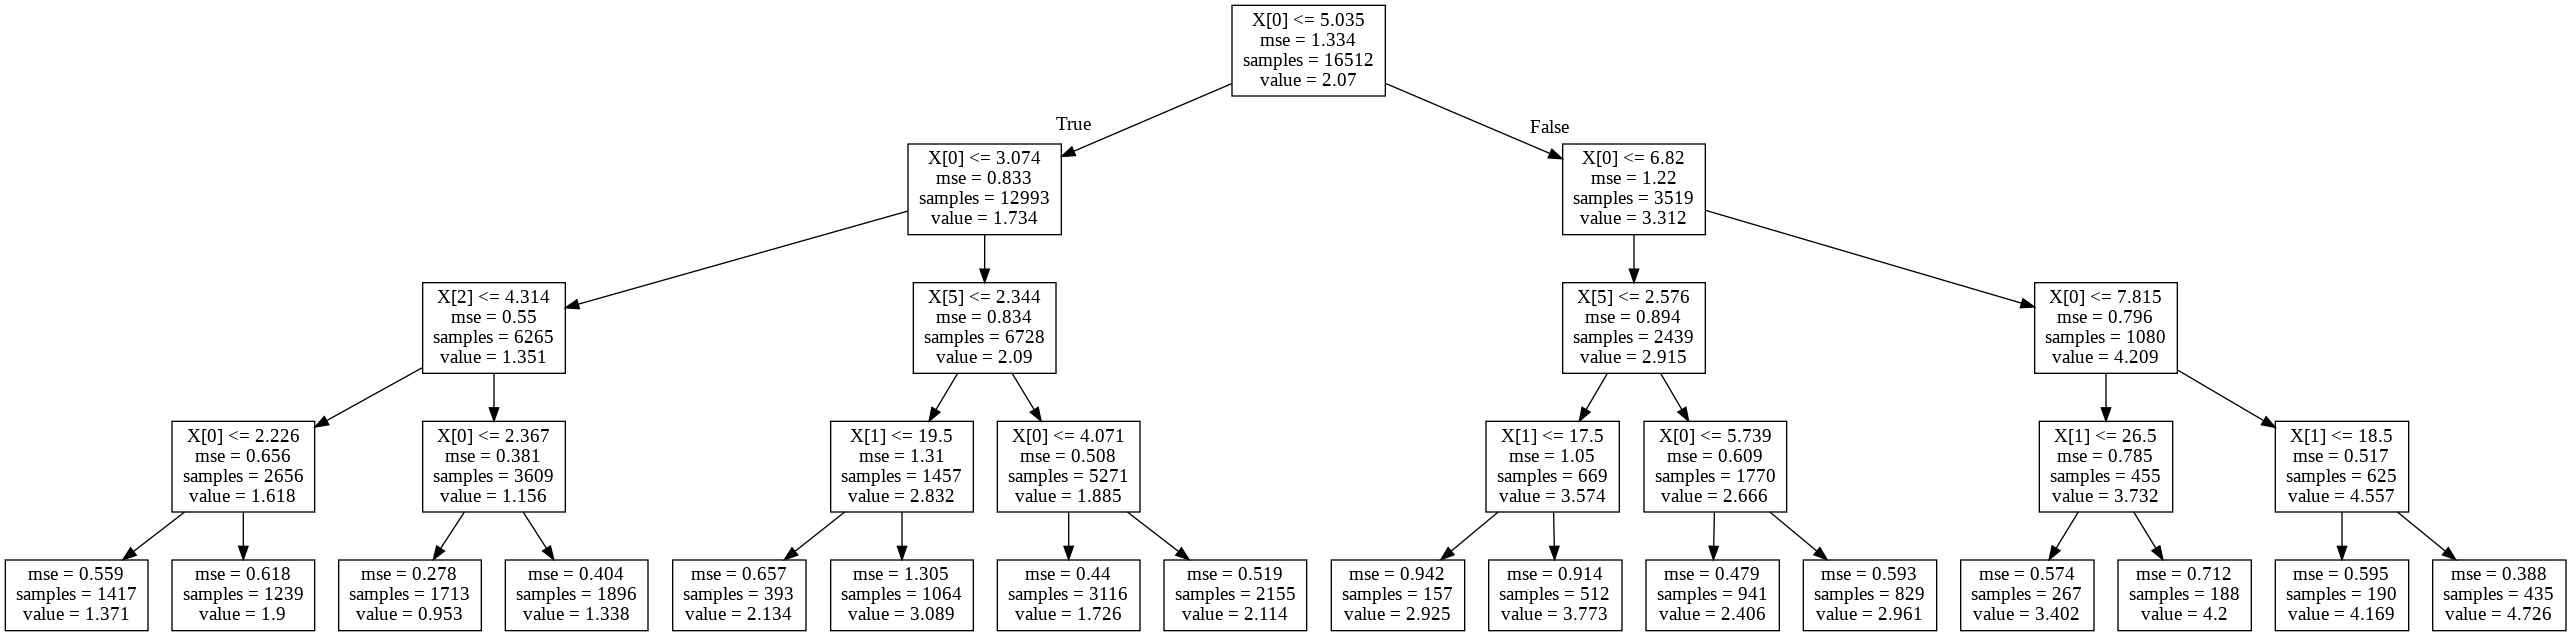

In [ ]:
# Graph and text reports on fitted tree
from sklearn.tree import export_text, export_graphviz
import pydotplus
from IPython.display import Image 
r = export_text(reg, feature_names=list(data.feature_names))
print(r)
dot_data=export_graphviz(reg)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())


In [ ]:
# Another way plotting the tree
#from sklearn.tree import plot_tree
#plot_tree(reg)

In [ ]:
# Inspect Feature importances
import numpy as np
importance = reg.feature_importances_
print(importance.sum())
idf = pd.DataFrame(data.feature_names, columns=['Feature'])
idf['Importance'] = importance
idf = idf.sort_values('Importance',ascending=False)
idf

1.0


,Feature,Importance
0,MedInc,0.829474
5,AveOccup,0.109858
1,HouseAge,0.035456
2,AveRooms,0.025211
3,AveBedrms,0.000000
4,Population,0.000000
6,Latitude,0.000000
7,Longitude,0.000000


### Exercise

Check which features you can remove from the tree and still achieve the same/similar variance on your predictions.

# Next Notebook